In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = pd.read_csv('pre_data/HouserPriceDatasets.csv')
datasets.head()

id unitnumber  latitude  street_id  living_size   list_time  \
0  88028008        NaN  21.06633     1279.0          NaN  2021-09-10   
1  88024425        NaN  21.04346     2656.0         33.0  2021-09-10   
2  88025621         29  21.05455      706.0         26.0  2021-09-10   
3  88024622        NaN  21.07005      714.0        400.0  2021-09-10   
4  88026260        NaN  21.01137      477.0        300.0  2021-09-10   

   property_road_condition  property_back_condition  floors  region  ...  \
0                      NaN                      NaN     NaN      12  ...   
1                      1.0                      NaN     4.0      12  ...   
2                      NaN                      1.0     2.0      12  ...   
3                      NaN                      NaN     NaN      12  ...   
4                      NaN                      NaN     NaN      12  ...   

   width                                               body area  longitude  \
0    NaN  Nhà mới chủ đầu tư xây có tiếng trong quận nên...   81  105.89775   
1    3.0  Bán nhà ĐC: Phúc Lý - Minh Khai - BTL, ô tô đỗ...  129  105.92894   
2    4.0  Bán nhà 26,6 m2 hai tầng, 2 phòng ngủ, 1 phòng...   78  105.83968   
3    5.0  HOT!HOT!SỞ HỮU NGAY NHÀ 7 TẦNG MỚI XÂY -  KINH...   78  105.82625   
4   34.0  Nhà mặt phố Yên Lãng, nhà xây 5 tầng diện tích...   75  105.81657   

   area_v2  direction                                            subject  \
0    12081        NaN    Bán nhà Ngô Gia Tự, 48m2x4t, 4 ngủ. giá 3.5 tỷ.   
1    12129        2.0    CC nhà Phúc Lý - Minh Khai - BTL, 33m2 x 4 tầng   
2    12078        8.0              Bán nhà trong ngõ 76 An Dương yên phụ   
3    12078        NaN  Bán Gấp Nhà 7 Tầng MT 5m Đ. Âu Cơ Quận Tây Hồ ...   
4    12075        6.0            Nhà mặt phố Yên Lãng - Đống Đa - Hà Nội   

  toilets category  length  
0     4.0     1020     NaN  
1     3.0     1020     9.0  
2     2.0     1020     6.6  
3     4.0     1020   140.0  
4     5.0     1020   210.0  

[5 rows x 34 columns]

In [2]:
datasets.columns

Index(['id', 'unitnumber', 'latitude', 'street_id', 'living_size', 'list_time',
       'property_road_condition', 'property_back_condition', 'floors',
       'region', 'size', 'ward', 'street_number', 'project_oid',
       'furnishing_sell', 'region_v2', 'rooms', 'shop', 'block', 'price',
       'house_type', 'property_legal_document', 'projectid', 'shop_alias',
       'width', 'body', 'area', 'longitude', 'area_v2', 'direction', 'subject',
       'toilets', 'category', 'length'],
      dtype='object')

In [2]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22308 entries, 0 to 22307
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       22308 non-null  int64  
 1   unitnumber               410 non-null    object 
 2   latitude                 20680 non-null  float64
 3   street_id                22095 non-null  float64
 4   living_size              16339 non-null  float64
 5   list_time                22308 non-null  object 
 6   property_road_condition  5979 non-null   float64
 7   property_back_condition  5672 non-null   float64
 8   floors                   12814 non-null  float64
 9   region                   22308 non-null  int64  
 10  size                     22299 non-null  float64
 11  ward                     22058 non-null  float64
 12  street_number            2264 non-null   object 
 13  project_oid              902 non-null    float64
 14  furnishing_sell       

In [3]:
import plotly.express as px

fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [60]:
datasets.area_v2.unique()

array([12081, 12129, 12078, 12075, 12077, 12079, 12076, 12084, 12086,
       12073, 12123, 12080, 12074, 12121, 12082, 12093, 12124, 12090,
       12089, 12083, 12088, 12092, 12087, 12125, 12127, 12091, 12126,
       12122, 12128, 12094], dtype=int64)

In [61]:
datasets.area.unique()

array([ 81, 129,  78,  75,  77,  79,  76,  84,  86,  73, 123,  80,  74,
       121,  82,  93, 124,  90,  89,  83,  88,  92,  87, 125, 127,  91,
       126, 122, 128,  94], dtype=int64)

In [2]:
datasets = datasets.dropna(subset=['size', 'house_type', 'rooms', 'street_id', 'ward'])
datasets.drop(['body', 'category', 'region_v2', 'subject', 'area', 'region'], axis=1, inplace=True)

In [5]:
fig = px.bar(data_frame=datasets.notnull().sum(), text='value')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', autosize=False, barmode='group',
                 width=1200, height=500, xaxis={'categoryorder':'total descending'}, )

fig.update_xaxes(automargin=True)

In [11]:
(datasets['price'] / datasets['size']).sort_values()

6275     1.000000e+00
3554     4.285714e+00
1330     7.500000e+01
9682     2.066667e+04
10812    2.080000e+04
             ...     
13269    1.468750e+10
16816    1.170213e+11
18336    4.848485e+11
11647    5.166667e+11
18976    5.333333e+11
Length: 21867, dtype: float64

In [14]:
px.scatter(x=range(21867), y = (datasets['price'] / datasets['size']).sort_values())

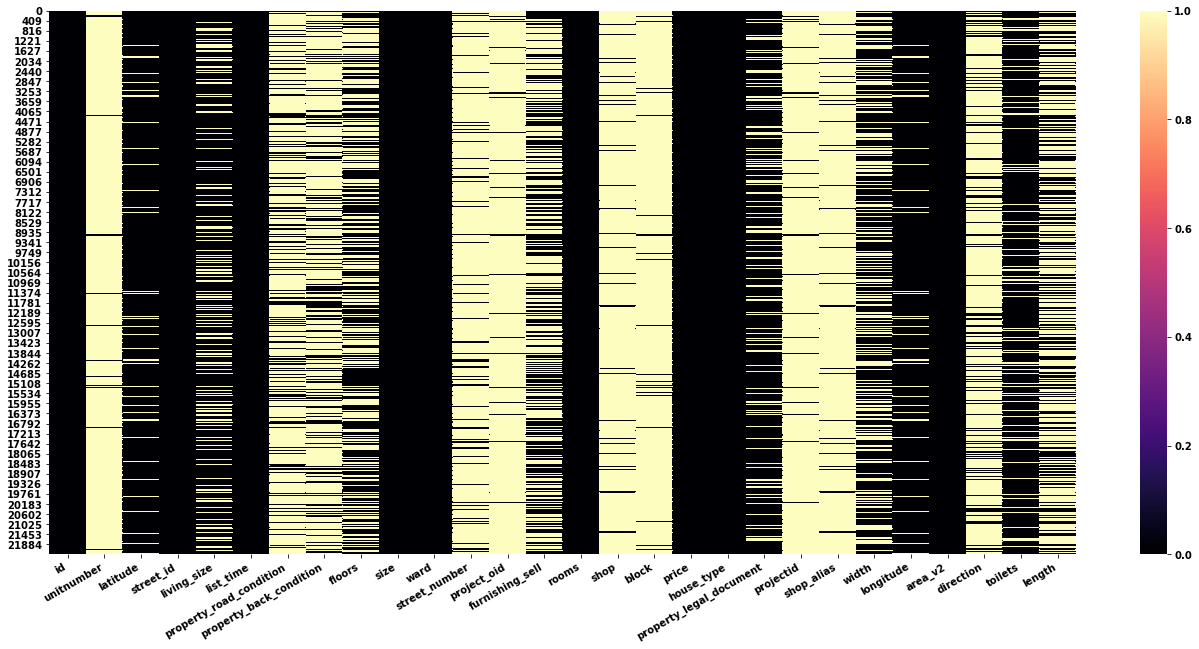

In [4]:
import seaborn as sns

plt.figure(figsize=(23,10))
sns.heatmap(datasets.isnull(), cbar=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.show()


In [7]:
px.scatter(x=datasets['price'].index, y = datasets['price'])

In [10]:
px.scatter(x=datasets[datasets.price < 1000e9]['price'].index, y = datasets[datasets.price < 1000e9]['price'])

In [16]:
with pd.option_context('display.max_colwidth', None):
    display(datasets[datasets.price > 100e9][['subject', 'body']])
    

subject  \
198           Chính chủ bán nhà mặt tiền phố cố Hàng Buồm   
417                     Cần bán nhà chuyển lên gần Hồ Tây   
1336   Bán Nhà Phố Trần Nhân Tông,Lô Góc,245m2, Giá 105tỷ   
1595              Bán Tòa Khách sạn 4**** Cầu giấy 175 tỷ   
1600                          Nhà Quận Hai Bà Trưng 188m²   
...                                                   ...   
20960           nhà Sát mép Hồ Tây, 3 mặt thoáng, cự hiếm   
21042             BÁN BIỆT THỰ ĐỘC BẢN NGAY BẾN DU THUYỀN   
21356     Bán nhà mặt phố Trường Chinh, dt 360m2, mt 18m,   
21390  Biệt thự mặt phố Nguyễn Gia Thiều, dt 535m2, mt 20   
21517    Mặt phố Lý Thường Kiệt 300m2,10 tầng,Cần bán gấp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  
198                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Tôi cần bán nhà mặt tiền tại phố đi bộ Hàng Buồm. Nhà chính chủ, giấy tờ hợp pháp, không tranh chấp, đầy đủ tiện nghi và đồ dùng sinh hoạt còn rất mới. Diện tích lớn, mặt tiền lớn, giá trị đang cho thuê cao. Tôi bán cả 2 số nhà liền kề bao gồm cả các hộ khác phía trong nhà tôi. 1 số nhà bao gồm khoảng hơn 150m2 (tổng hơn 300m2). Hai mặt bằng này hiện đang cho thuê giá cao, rất thuận tiện để kinh doanh, làm quán cafe phố cổ, ngân hàng và homestay cho khách du lịch. Liên hệ xem nhà trong giờ hành chính: 0586.00.2222 (chính chủ, tặng trung gian hoa hồng thỏa thuận)  
417                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [23]:
datasets = datasets[datasets.price < 100e9]

In [27]:
datasets.house_type.unique()

array([ 3.,  1.,  2.,  4., nan])

In [33]:
datasets[datasets.house_type == 4.0]['id']

63       88041027
64       88045870
84       88041147
107      88057830
109      87868733
           ...   
22195    88684006
22231    89840417
22267    89740045
22286    89332030
22302    89524523
Name: id, Length: 802, dtype: int64

In [34]:
with pd.option_context('display.max_colwidth', None):
    display(datasets.query('price > 80e9')[['subject', 'body', 'house_type', 'size']])

subject  \
300    Biệt thự Nghĩa Đô, NT Châu Âu, 300m, Mt 14m, 84 tỷ   
357    Biệt thự 4T thang máy K Víp Đô Nghĩa, 300m, Mt 14m   
2171                       MẶT PHỐ VIP . VỊ TRÍ SIÊU ĐẸP.   
3080       Bán siêu biệt thự phố Đỗ Quang, diện tích 265m   
3162   Bán Biệt Thự Phân lô, Lô góc, Trung Kính 300M2x20M   
3977   Mặt phố Triệu Việt Vương, Hai Bà Trưng 191m2, MT8m   
4690       Nhà mặt phố Tây Hồ 202m2x3T, MT 8m, lô góc, rẻ   
7578    Nhà 7T 162m2 mặt trước Xã Đàn mặt sau Đê La Thành   
15984       TÂY HỒ - APARTMENT- HIỆU SUẤT 500 TRIỆU/THÁNG   
16769   Mặt Phố Đại La, 310m2 MTx10m, Trương Định, Hai Bà   
17681        CHÍNH CHỦ CẦN BÁN GẤP CĂN GÓC VIEW HỒ YÊN SỞ   
18719    Bán nhà mặt phố Hàng Vải  136m2 giá chỉ có 89 tỷ   
19935   Mặt phố Đê La Thành 10T 1 hầm 300m2 - 2 thang máy   
21444                 Bán nhà chính chủ 148 Phó Đức Chính   
21855    Bán nhà mặt phố Hàng Bạc dt 117m2, mt 5m, xây 3t   
21940  Bán nhà mặt phố Nguyễn Văn Tuyết. DT: 325m2 MT 12m   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              body  \
300                                                                                                                                                                                                                                                                                                                                                                                                                                                           + Chính chủ cần bán nhà biệt thự KĐTM Nghĩa Đô, Cầy Giấy: 300m2, 4 tầng, mặt tiền 14m, 84 tỷ.\r\n+ Vị trí đắc địa, Quận Cầu Giấy, gần trung tâm thủ đô, đường vành đai 2 và 3, kết nối giao thương đi các tỉnh thành.\r\n+ Nhà 4 tầng, thiết kế hiện đại sang trọng, chủ tự xây hoàn thành trong 4 năm, tiện nghi như khách sạn, thang máy, nội thất nhập khẩu Châu Âu, HT lưu điện 24/7 khi mất điện ngót 1tỷ, ...\r\n+ Không gian xanh thư giãn hưởng thụ, tiểu cảnh, cây xanh gần 200m2 xung quanh nhà, hàng xóm toàn quan lớn, doanh nhân. Chủ nhà là tổng giám đốc công ty lớn, nhiều biệt thự nên bán bớt.\r\n + Sổ đỏ vuông phân lô, chính chủ.\r\n + Giá: 84 tỷ. Có thương lượng.\r\n Liên hệ: Anh Ngọc Ký: \r\nNhà Mặt phố, Tòa nhà, Khách sạn và Biệt thự.   
357                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Khu Víp Đô Nghĩa: 300m, 4 tầng, mặt tiền 14m, 84 tỷ. \r\n+ Cần bá

In [24]:
px.scatter(x=datasets['price'].index, y = datasets['price'])

In [9]:
px.scatter(x=datasets[datasets.price < 100e9]['price'].index, y = datasets[datasets.price < 100e9]['price'])

D:\Users\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

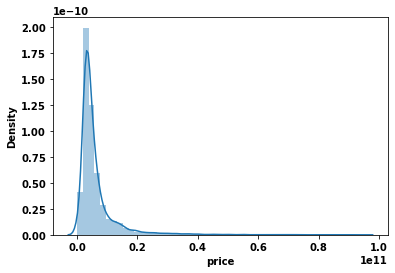

In [20]:
sns.distplot(datasets[datasets.price < 100e9]['price'])

In [21]:
datasets.columns

Index(['id', 'unitnumber', 'latitude', 'street_id', 'living_size', 'list_time',
       'property_road_condition', 'property_back_condition', 'floors',
       'region', 'size', 'ward', 'street_number', 'project_oid',
       'furnishing_sell', 'rooms', 'shop', 'block', 'price', 'house_type',
       'property_legal_document', 'projectid', 'shop_alias', 'width',
       'longitude', 'area_v2', 'direction', 'toilets', 'length'],
      dtype='object')

In [3]:
cols = [ 'size', 'house_type', 'area_v2', 'ward', 'street_id', 'rooms']

features_numerical = datasets[cols].copy()

In [17]:
import plotly.express as px

for i in cols:
    fig = px.scatter(x = datasets[i], y = datasets.price)
    fig.update_layout(title = i)
    fig.show()